# Les bibliothèques

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools
import os

from PIL import Image
from os import listdir
from os.path import isfile, join
import cv2
import os
from pathlib import Path
from os.path import basename

Using TensorFlow backend.


# Téléchargement de données

In [ ]:
data = np.load('/content/drive/My Drive/ORL_faces.npz') 

x_train = data['trainX']

x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255


y_train= data['trainY']
y_test= data['testY']


print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

# Split dataset

In [ ]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=0.2)

In [ ]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 192
x_test shape: (160,)


# Construction du modèle

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Convolution2D, MaxPooling2D,MaxPool2D
import os
import numpy as np
from keras.regularizers import l2


my_model= Sequential()

my_model.add(Convolution2D(32, (7, 7), padding='same',input_shape=im_shape, activation='relu',
                           kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
my_model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

my_model.add(Convolution2D(64, (5, 5), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

my_model.add(Convolution2D(128, (3, 3), padding='same', activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

my_model.add(Flatten())

my_model.add(Dense(2024, activation='relu'))
Dropout(0.5)
my_model.add(Dense(1024,activation='relu'))
Dropout(0.5)
my_model.add(Dense(512,activation='relu'))
Dropout(0.5)
my_model.add(Dense(20,activation='softmax'))

my_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)


In [ ]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 112, 92, 32)       1600      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 46, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 46, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 23, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 11, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 19712)            

# Data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)


datagen.fit(x_train)

# L'entrainement du modèle

In [ ]:
history = my_model.fit_generator(datagen.flow(np.array(x_train), np.array(y_train), batch_size=512),
                              epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)))

Epoch 1/250
 - 9s - loss: 3.0133 - accuracy: 0.0521 - val_loss: 3.2926 - val_accuracy: 0.0417
Epoch 2/250
 - 8s - loss: 3.0505 - accuracy: 0.0521 - val_loss: 2.9875 - val_accuracy: 0.0833
Epoch 3/250
 - 8s - loss: 3.0288 - accuracy: 0.0417 - val_loss: 3.0138 - val_accuracy: 0.0208
Epoch 4/250
 - 8s - loss: 3.0052 - accuracy: 0.0573 - val_loss: 3.0253 - val_accuracy: 0.0208
Epoch 5/250
 - 8s - loss: 2.9993 - accuracy: 0.0573 - val_loss: 3.0382 - val_accuracy: 0.0208
Epoch 6/250
 - 8s - loss: 2.9898 - accuracy: 0.0625 - val_loss: 3.0626 - val_accuracy: 0.0208
Epoch 7/250
 - 8s - loss: 2.9692 - accuracy: 0.1042 - val_loss: 3.0546 - val_accuracy: 0.0625
Epoch 8/250
 - 8s - loss: 2.9369 - accuracy: 0.1302 - val_loss: 2.9562 - val_accuracy: 0.1875
Epoch 9/250
 - 8s - loss: 2.8608 - accuracy: 0.2448 - val_loss: 2.8625 - val_accuracy: 0.1042
Epoch 10/250
 - 8s - loss: 2.7349 - accuracy: 0.1615 - val_loss: 2.5132 - val_accuracy: 0.2500
Epoch 11/250
 - 8s - loss: 2.5833 - accuracy: 0.2969 - val_

# Evaluation du modèle

In [ ]:
scor = my_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.1167
test acc 0.9625


In [ ]:
predicted =np.array( my_model.predict(x_test))
ynew = my_model.predict_classes(x_test)

Acc=accuracy_score(y_test, ynew)
print("accuracy : ",Acc)

accuracy :  0.95625


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


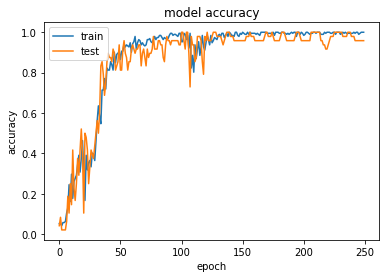

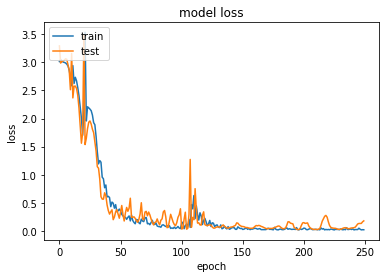

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
my_model.save('/content/drive/My Drive/my_model.h5')